In [18]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.stats import poisson

In [19]:
Q0 =fits.open('01_Q0.lc')
Q1 =fits.open('01_Q1.lc')
Q2 =fits.open('01_Q2.lc')
Q3 =fits.open('01_Q3.lc')

TriggerTime = 358904087.0

In [20]:
Q0_time = Q0[1].data['TIME'][18710:20740]
Q0_rate = Q0[1].data['RATE'][18710:20740]

Q1_time = Q1[1].data['TIME'][18710:20740]
Q1_rate = Q1[1].data['RATE'][18710:20740]

Q2_time = Q2[1].data['TIME'][18710:20740]
Q2_rate = Q2[1].data['RATE'][18710:20740]

Q3_time = Q3[1].data['TIME'][18710:20740]
Q3_rate = Q3[1].data['RATE'][18710:20740]

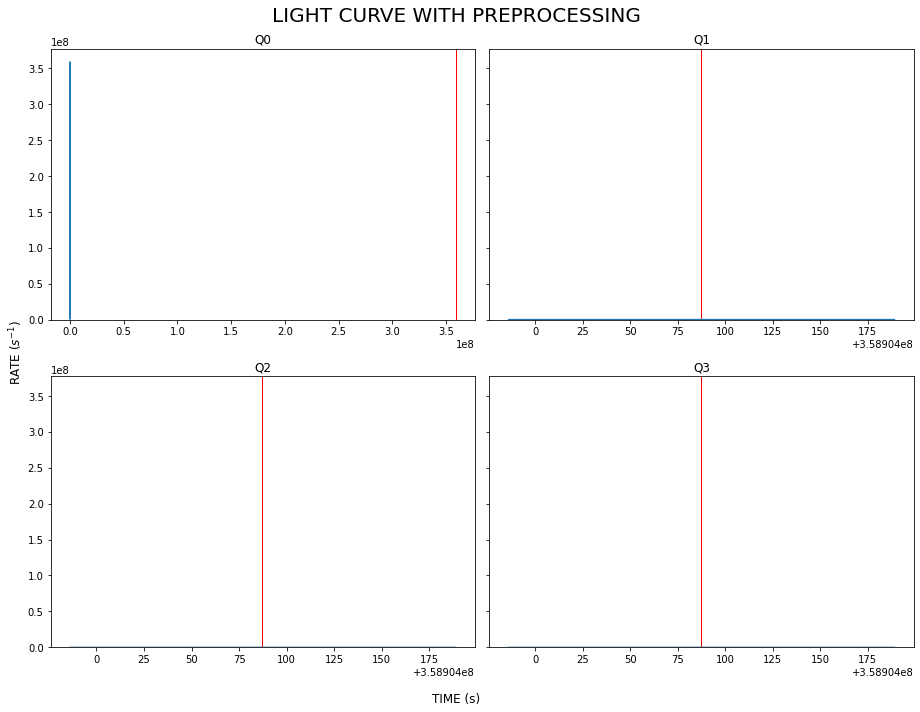

In [21]:
figure, axis = plt.subplots(2, 2, figsize=(13, 10), sharey=True)

figure.suptitle('LIGHT CURVE WITH PREPROCESSING',fontsize=20)
axis[0, 0].plot(Q0_time , Q0_rate)
axis[0, 0].set_title("Q0")
axis[0, 0].axvspan(358904087,358904087, color='r')

axis[0, 1].plot(Q1_time , Q1_rate)
axis[0, 1].set_title("Q1")
axis[0, 1].axvspan(358904087,358904087, color='r')

axis[1, 0].plot(Q2_time , Q2_rate)
axis[1, 0].set_title("Q2")
axis[1, 0].axvspan(358904087,358904087, color='r')

axis[1, 1].plot(Q3_time , Q3_rate)
axis[1, 1].set_title("Q3")
axis[1, 1].axvspan(358904087,358904087, color='r')

figure.supxlabel('TIME (s)')
figure.supylabel('RATE ($s^{-1}$)')
plt.tight_layout()

In [5]:
def plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
           Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data):
    figure, axis = plt.subplots(4, 2, figsize=(15, 15))
    axis[0, 0].stairs(Q0_time, Q0_rate, label = 'Light Curve')
    axis[0, 0].stairs(Q0_time, Q0_trend, label = 'Trend')
    axis[0, 0].legend(loc='best')
    axis[0, 0].set_title("Q0")
    axis[0, 1].stairs(Q0_time, Q0_detrend_data, label = 'Detrended Curve')
    axis[0, 1].legend(loc='best')
    axis[0, 1].set_title("Q0_detrended")

    axis[1, 0].plot(Q1_time, Q1_rate, label = 'Light Curve')
    axis[1, 0].plot(Q1_time, Q1_trend, label = 'Trend')
    axis[1, 0].legend(loc='best')
    axis[1, 0].set_title("Q1")
    axis[1, 1].plot(Q1_time, Q1_detrend_data, label = 'Detrended Curve')
    axis[1, 1].legend(loc='best')
    axis[1, 1].set_title("Q1_detrended")

    axis[2, 0].plot(Q2_time, Q2_rate, label = 'Light Curve')
    axis[2, 0].plot(Q2_time, Q2_trend, label = 'Trend')
    axis[2, 0].legend(loc='best')
    axis[2, 0].set_title("Q2")
    axis[2, 1].plot(Q2_time, Q2_detrend_data, label = 'Detrended Curve')
    axis[2, 1].legend(loc='best')
    axis[2, 1].set_title("Q2_detrended")

    axis[3, 0].plot(Q3_time, Q3_rate, label = 'Light Curve')
    axis[3, 0].plot(Q3_time, Q3_trend, label = 'Trend')
    axis[3, 0].legend(loc='best')
    axis[3, 0].set_title("Q3")
    axis[3, 1].plot(Q3_time, Q3_detrend_data, label = 'Detrended Curve')
    axis[3, 1].legend(loc='best')
    axis[3, 1].set_title("Q3_detrended")
    plt.tight_layout()

In [6]:
def get_noise_with_nan(rate):
    GRB_start = 1011
    GRB_end = 1021
    noise = np.concatenate([rate[:GRB_start], [np.nan]*(GRB_end-GRB_start),rate[GRB_end:]])
    return noise

In [7]:
def savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,plot):
    print('SAVGOL FILTER')
    window_length = 100
    polyorder=5

    Q0_noise = get_noise_with_nan(Q0_rate)
    Q0_trend = signal.savgol_filter(Q0_noise, window_length, polyorder)
    valid = ~(np.isnan(Q0_trend))
    model = np.poly1d(np.polyfit(Q0_time[valid], Q0_trend[valid], 2))
    Q0_detrend_data = Q0_rate-model(Q0_time)
    Q0_trend = model(Q0_time)

    Q1_noise = get_noise_with_nan(Q1_rate)
    Q1_trend = signal.savgol_filter(Q1_noise, window_length, polyorder)
    valid = ~(np.isnan(Q1_trend))
    model = np.poly1d(np.polyfit(Q1_time[valid], Q1_trend[valid], 2))
    Q1_detrend_data = Q1_rate-model(Q1_time)
    Q1_trend = model(Q1_time)

    Q2_noise = get_noise_with_nan(Q2_rate)
    Q2_trend = signal.savgol_filter(Q2_noise, window_length, polyorder)
    valid = ~(np.isnan(Q2_trend))
    model = np.poly1d(np.polyfit(Q2_time[valid], Q2_trend[valid], 2))
    Q2_detrend_data = Q2_rate-model(Q2_time)
    Q2_trend = model(Q2_time)

    Q3_noise = get_noise_with_nan(Q3_rate)
    Q3_trend = signal.savgol_filter(Q3_noise, window_length, polyorder)
    valid = ~(np.isnan(Q3_trend))
    model = np.poly1d(np.polyfit(Q3_time[valid], Q3_trend[valid], 2))
    Q3_detrend_data = Q3_rate-model(Q3_time)
    Q3_trend = model(Q3_time)
    
    if plot=='YES':
        plot_curve(Q0_time,Q0_rate,Q0_trend,Q0_detrend_data,Q1_time,Q1_rate,Q1_trend,Q1_detrend_data,
               Q2_time,Q2_rate,Q2_trend,Q2_detrend_data,Q3_time,Q3_rate,Q3_trend,Q3_detrend_data)

    return Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data

In [8]:
def get_noise_and_signal(data):
    GRB_start = 1011
    GRB_end = 1021
    
    return [data[GRB_start:GRB_end] ,np.concatenate([data[:GRB_start], data[GRB_end:]])]

In [9]:
def SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data):    
    print('(S-B)/std SNR')
    
    sig,noise = get_noise_and_signal(Q0_detrend_data)
    Q0_SNR = sum(sig)/np.std(noise)
    print('Q0 SNR = ',Q0_SNR)

    sig,noise = get_noise_and_signal(Q1_detrend_data)
    Q1_SNR = sum(sig)/np.std(noise)
    print('Q1 SNR = ',Q1_SNR)

    sig,noise = get_noise_and_signal(Q2_detrend_data)
    Q2_SNR = sum(sig)/np.std(noise)
    print('Q2 SNR = ',Q2_SNR)

    sig,noise = get_noise_and_signal(Q3_detrend_data)
    Q3_SNR = sum(sig)/np.std(noise)
    print('Q3 SNR = ',Q3_SNR)
    
    sig,noise = get_noise_and_signal(Q0_detrend_data+ Q1_detrend_data+ Q2_detrend_data+ Q3_detrend_data)
    Combined_SNR = sum(sig)/np.std(noise)
    print('Combined SNR = ',Combined_SNR)

SAVGOL FILTER


<ipython-input-10-98ae0e3de7ad>:1: RankWarning: Polyfit may be poorly conditioned
  Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'YES')
<ipython-input-10-98ae0e3de7ad>:1: RankWarning: Polyfit may be poorly conditioned
  Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'YES')
<ipython-input-10-98ae0e3de7ad>:1: RankWarning: Polyfit may be poorly conditioned
  Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'YES')
<ipython-input-10-98ae0e3de7ad>:1: RankWarning: Polyfit may be poorly conditioned
  Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'YES')


ValueError: Size mismatch between "values" and "edges". Expected `len(values) + 1 == len(edges)`, but `len(values) = 2030` and `len(edges) = 2030`.

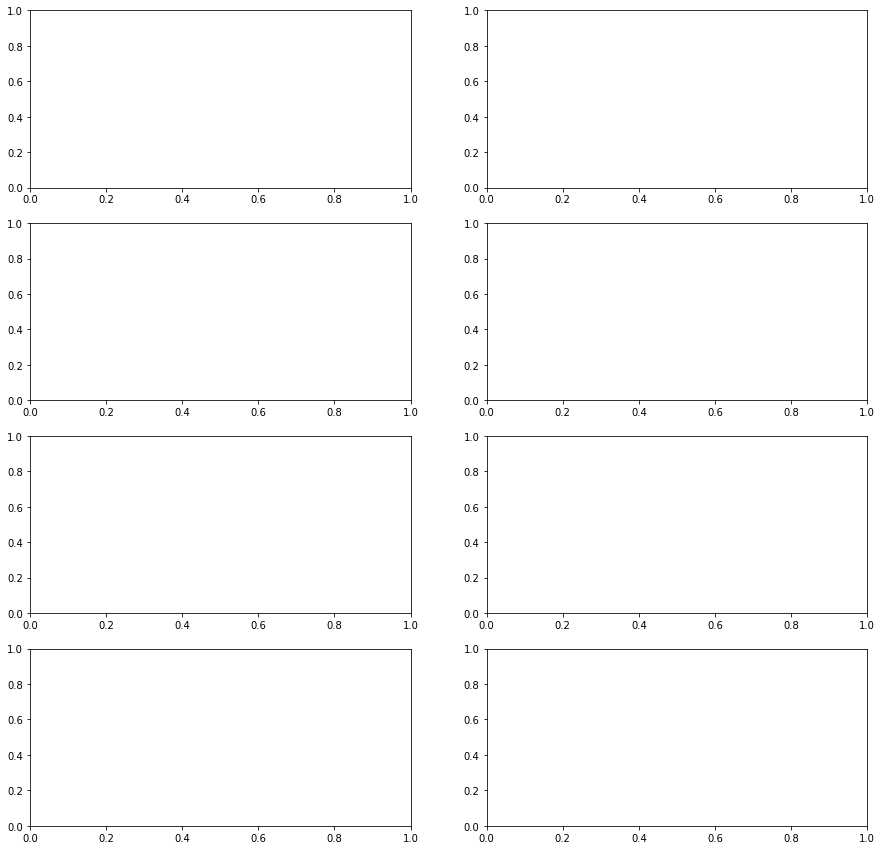

In [10]:
Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data = savgol_filter(Q0_rate,Q1_rate,Q2_rate,Q3_rate,'YES')
SNR_SBstd(Q0_detrend_data, Q1_detrend_data, Q2_detrend_data, Q3_detrend_data)